In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


**What is regression?**

**Examples:**
how much this house will sell for?
how much will my health insurence will be?
how many people will buy this product?

**predict the number**- regression

In [ ]:
#create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

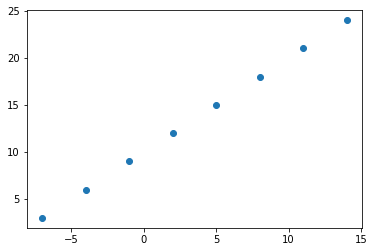

In [ ]:
plt.scatter(X,y)

In [ ]:
#create demo tensor

house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([967000])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([967000], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

((8,), (8,))

**Steps in modeling with tensorflow:**

1. Creating a model
2. compile the model
3. fit data into model



**Sequential**: groups a linear stack of layers into tf.keras.Model.It provides training and inference features on this model

In [ ]:
tf.random.set_seed(42)

#create model sequentially
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])


#complie the model
model.compile(loss=tf.keras.losses.mae,#mean absolute error
              optimizer=tf.keras.optimizers.SGD(),#stochastic gradient descent
              metrics=["mae"])

#fit model
model.fit(X,y,epochs=5,verbose=2)


Epoch 1/5
1/1 - 0s - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 - 0s - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 - 0s - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 - 0s - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 - 0s - loss: 10.9748 - mae: 10.9748


In [ ]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving model

##### try changing number of epochs

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 253ms/step - loss: 12.0594 - mae: 12.0594
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9269 - mae: 11.9269
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7944 - mae: 11.7944
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6619 - mae: 11.6619
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5294 - mae: 11.5294
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3969 - mae: 11.3969
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2644 - mae: 11.2644
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1319 - mae: 11.1319
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9994 - mae: 10.9994
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8669 - mae: 10.8669
Epoch 11/100
1/1 [==============================] - 0s 3

In [ ]:
model.predict([17.0])

array([[29.854897]], dtype=float32)

model perfoemnace is improved as we can see mae loss decreased than earlier model

###### Try changing optimizer

In [ ]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=["mae"])

model2.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 292ms/step - loss: 8.9781 - mae: 8.9781
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9777 - mae: 8.9777
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9772 - mae: 8.9772
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9768 - mae: 8.9768
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9763 - mae: 8.9763
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9759 - mae: 8.9759
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9754 - mae: 8.9754
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9750 - mae: 8.9750
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9745 - mae: 8.9745
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9741 - mae: 8.9741
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 8.973

In [ ]:
model2.predict([17.0])

array([[22.143314]], dtype=float32)

###### Try changing number of hidden layers

In [ ]:
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(100))
model3.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model3.add(tf.keras.layers.Dense(1))


model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

model3.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 295ms/step - loss: 13.9521 - mae: 13.9521
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4446 - mae: 13.4446
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9549 - mae: 12.9549
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4617 - mae: 12.4617
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9696 - mae: 11.9696
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4670 - mae: 11.4670
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9509 - mae: 10.9509
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4312 - mae: 10.4312
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8846 - mae: 9.8846
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3138 - mae: 9.3138
Epoch 11/100
1/1 [==============================] - 0s 4ms/s

In [ ]:
model3.predict([17.0])

array([[31.47713]], dtype=float32)

Common ways to improve the model

Better we can change only one parameter at a time to identify what is affecting model.

1. Add hidden layers
2. increase number of hidden units
3. change the activation function
4. Change optimizers
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer



Learning rate is most important parameter


In [ ]:
model4=tf.keras.Sequential([
                            tf.keras.layers.Dense(50,activation=None),
                            tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])

model4.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 13.3249 - mae: 13.3249
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6854 - mae: 12.6854
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0448 - mae: 12.0448
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3997 - mae: 11.3997
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7465 - mae: 10.7465
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0817 - mae: 10.0817
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 9.4019 - mae: 9.4019
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7039 - mae: 8.7039
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9847 - mae: 7.9847
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2413 - mae: 7.2413
Epoch 11/100
1/1 [==============================] - 0s 5ms/ste

In [ ]:
model4.predict([17.0])

array([[27.153084]], dtype=float32)

**Evaluating model**

```In practice typical workflow you will go through when building neaural networks ```

```Build model- fit model - evaluate model - tune the model```




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# make bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#make labels for data set
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

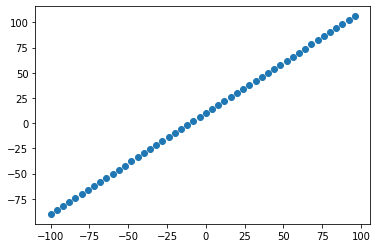

In [ ]:
plt.scatter(X,y)

**Data need to be devided into 3 parts:**

1. Training set : this covers almost 70-80 % of data points from entire data set

2. Validation set : The model gets tuned on this data 10-15 % of available data

3. Test set : model gets evaluated on this data (10-15% of available data)



Depending on available data we can keep validation data as optional set.

In [ ]:
len(X)

50

In [ ]:
#split the data in train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(np.array(X),np.array(y), test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape


((40,), (10,), (40,), (10,))

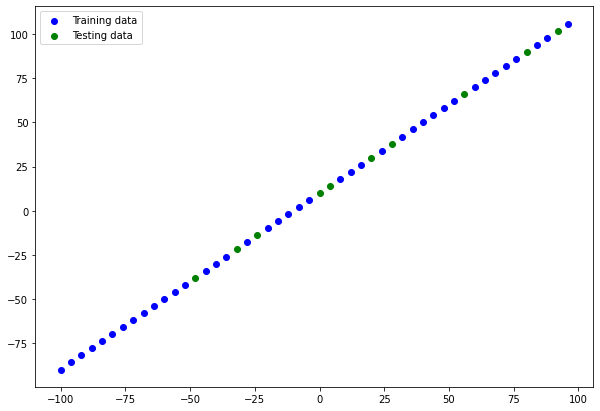

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")

plt.scatter(X_test,y_test,c="g",label="Testing data")

plt.legend()

In [ ]:
#create model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
#model.fit(X_train,y_train,epochs=10,verbose=1)

###### visualize model


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#lets define input shape

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1,input_shape=[1])# one input which is scalar number here
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. Total param : total number of parameters in the model
2. Total trainable param : These are parameters the model can update while training
3. Non trainable param : when we bring already learn parameters or during transfer learning


MIT's introduction to deep learning


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 96.7977 - mae: 96.7977
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 90.2296 - mae: 90.2296
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 77.0137 - mae: 77.0137
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 69.7416 - mae: 69.7416
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 59.6857 - mae: 59.6857
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 49.1298 - mae: 49.1298
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 37.5523 - mae: 37.5523
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 29.1574 - mae: 29.1574
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.0393 - mae: 19.0393
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.4080 - mae: 10.4080
Epoch 11/100
2/2 [==============================] - 0s 7ms/

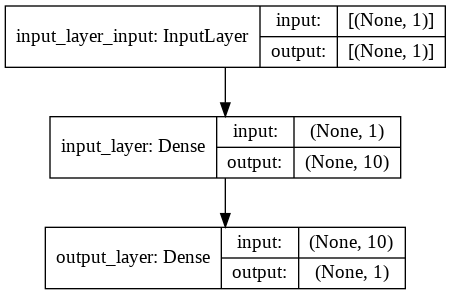

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
#Create model with 2layers input layer and output layer

model=tf.keras.Sequential([
                           
                           tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
                           tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")


model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


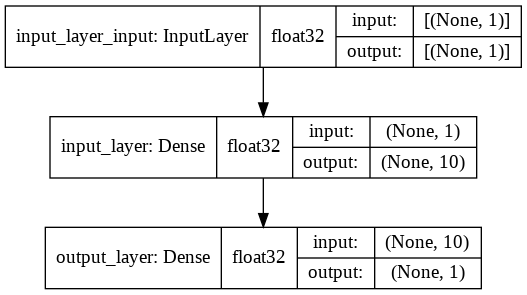

In [ ]:
plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True)

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0)

###### Visualizing model prediction

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[-40.885323],
       [ 70.03674 ],
       [ 31.640648],
       [ 95.63414 ],
       [-23.820387],
       [108.43285 ],
       [ 14.575712],
       [ 10.309479],
       [ 40.17312 ],
       [-15.287922]], dtype=float32)

In [ ]:
y_test

array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="r",label="Testing data ")
  plt.scatter(test_data,predictions,c="g",label="Predictions")
  plt.legend()

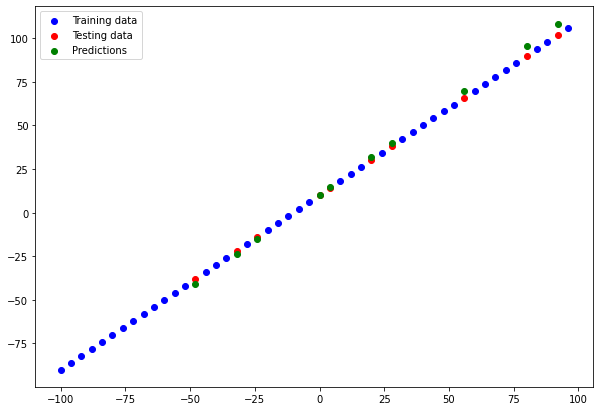

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

In [ ]:
model.predict([104])

array([[121.231544]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 145ms/step - loss: 2.6796 - mae: 2.6796


[2.679631233215332, 2.679631233215332]

In [ ]:
tf.metrics.mean_absolute_error(y_test,y_pred) # here y_test and y pred are not in same shape and type is not same

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([68.48531 , 52.822044, 37.92813 , 69.30731 , 54.25631 , 80.83286 ,
       37.6     , 38.338104, 40.069252, 48.77275 ], dtype=float32)>

In [ ]:
tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.6796327>

In [ ]:
tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=11.055946>

In [ ]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))


#####  Tracking your experiments

1. Tensorboard - tensorflow library to help track modelling experiments
2. Weights and biases - a tool for tracking all kinds of experiments(plug straight into tensorboard)





##### Saving the model

Saving a model allows us to use models outside of coding platform such as in mobile application/web applications


There are 2 main formats that model can be saved

1. savedModel format
2. HDF5 format

In [ ]:
model.save("best_model_savedFormat")

INFO:tensorflow:Assets written to: best_model_savedFormat/assets


In [ ]:
model.save("best_model_HDF5.h5")

Loading in saved model

In [ ]:
#Load in savedModel format
Savedmodel=tf.keras.models.load_model("/content/best_model_savedFormat")
Savedmodel.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_pred=model.predict(X_test)
loadedmodel_pred=Savedmodel.predict(X_test)

#compare predictions
model_pred==loadedmodel_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#load h5 format

loadedh5=tf.keras.models.load_model("/content/best_model_HDF5.h5")
h5model_pred=loadedh5.predict(X_test)

#compare predictions
h5model_pred==model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#download model

from google.colab import files
#files.download("/content/best_model_HDF5.h5")

## Create model on larger data set

In [ ]:
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


All columns are not in numbers some of them are in object.To convert them into numbers we convert them into one hot encoding.

We use pandas `get_dummies()` function

In [ ]:
df=pd.get_dummies(insurance )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
# create X and y
X=df.drop("charges",axis=1)
y=df["charges"]

X.shape, y.shape

((1338, 11), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train) ,len(X_test)

(1070, 268)

There will be 1070 values in train data and 268 data points in test data.

In [ ]:
#build neural network
tf.random.set_seed(42)
model_insurance=tf.keras.Sequential([
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#compile model
model_insurance.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


#fit model
model_insurance.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 970us/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 969us/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6838 - mae: 752

In [ ]:
#check results on insurance model on test data
model_insurance.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

Seems like model is not performing well.

#### improve model

`Experiment 1`

Increase number of layers

In [ ]:
#increase number of layers
tf.random.set_seed(42)
exp1_model=tf.keras.Sequential([                                
                                tf.keras.layers.Dense(50,activation='relu'),
                                tf.keras.layers.Dense(10,activation='relu'),
                                tf.keras.layers.Dense(1)
])
exp1_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"])

exp1_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12972.1132 - mae: 12972.1132
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12957.6859 - mae: 12957.6859
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12731.7528 - mae: 12731.7528
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13433.7703 - mae: 13433.7703
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13363.3660 - mae: 13363.3660
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13239.4486 - mae: 13239.4486
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.9590 - mae: 13284.9590
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13642.1977 - mae: 13642.1977
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13443.5910 - mae: 13443.5910
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13624.62

In [ ]:
#check results on insurance model on test data
exp1_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8649.5664 - mae: 8649.5664


[8649.56640625, 8649.56640625]

WE can see here model performance is not improved.lets change some few parameters

`Experiment 2`

Increase number of epoch from 100 to 500

In [ ]:
tf.random.set_seed(42)
exp2_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(16),                                
                                tf.keras.layers.Dense(1)
])

exp2_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"]
                   )

exp2_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 10145.7747 - mae: 10145.7747
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 7718.0042 - mae: 7718.0042
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 6992.7157 - mae: 6992.7157
Epoch 4/500
34/34 [==============================] - 0s 983us/step - loss: 7972.3278 - mae: 7972.3278
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7759.4733 - mae: 7759.4733
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7632.7485 - mae: 7632.7485
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7608.9336 - mae: 7608.9336
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7810.7687 - mae: 7810.7687
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7584.9142 - mae: 7584.9142
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 8081.9557 - mae: 8081.

In [ ]:
#check results on insurance model on test data
exp2_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4487.1475 - mae: 4487.1475


[4487.1474609375, 4487.1474609375]

`experiment 3`

Here we can see from experiment 2 that Mae loss i reduced to half .So model is making less error.lets try increaseing epocs to 1000

In [ ]:
tf.random.set_seed(42)
exp3_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(16),
                                tf.keras.layers.Dense(1)
])

exp3_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"])

exp3_model.fit(X_train,y_train,epochs=1000,verbose=2)

Epoch 1/1000
34/34 - 0s - loss: 8618.3154 - mae: 8618.3154
Epoch 2/1000
34/34 - 0s - loss: 7886.0889 - mae: 7886.0889
Epoch 3/1000
34/34 - 0s - loss: 7580.2642 - mae: 7580.2642
Epoch 4/1000
34/34 - 0s - loss: 7529.0020 - mae: 7529.0020
Epoch 5/1000
34/34 - 0s - loss: 7725.6338 - mae: 7725.6338
Epoch 6/1000
34/34 - 0s - loss: 7643.9248 - mae: 7643.9248
Epoch 7/1000
34/34 - 0s - loss: 7495.2046 - mae: 7495.2046
Epoch 8/1000
34/34 - 0s - loss: 7727.2856 - mae: 7727.2856
Epoch 9/1000
34/34 - 0s - loss: 7488.4067 - mae: 7488.4067
Epoch 10/1000
34/34 - 0s - loss: 7717.1860 - mae: 7717.1860
Epoch 11/1000
34/34 - 0s - loss: 7578.8315 - mae: 7578.8315
Epoch 12/1000
34/34 - 0s - loss: 7692.7432 - mae: 7692.7432
Epoch 13/1000
34/34 - 0s - loss: 7671.8032 - mae: 7671.8032
Epoch 14/1000
34/34 - 0s - loss: 7703.2656 - mae: 7703.2656
Epoch 15/1000
34/34 - 0s - loss: 7376.2979 - mae: 7376.2979
Epoch 16/1000
34/34 - 0s - loss: 7742.2959 - mae: 7742.2959
Epoch 17/1000
34/34 - 0s - loss: 7577.5649 - mae:

In [ ]:
exp3_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4566.6533 - mae: 4566.6533


[4566.6533203125, 4566.6533203125]

`experiment 4`

Changing more epochs not decreasing the model error.Lets change learning rate

In [ ]:
tf.random.set_seed(42)
exp4_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(16),
                                tf.keras.layers.Dense(1)
])
exp4_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                   metrics=["mae"])

exp4_model.fit(X_train,y_train,epochs=500,verbose=1)

Epoch 1/500
34/34 [==============================] - 0s 995us/step - loss: 13277.6179 - mae: 13277.6179
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12916.7549 - mae: 12916.7549
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12665.3965 - mae: 12665.3965
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13334.4350 - mae: 13334.4350
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13219.0100 - mae: 13219.0100
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13034.6153 - mae: 13034.6153
Epoch 7/500
34/34 [==============================] - 0s 978us/step - loss: 12992.2652 - mae: 12992.2652
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 13225.8626 - mae: 13225.8626
Epoch 9/500
34/34 [==============================] - 0s 956us/step - loss: 12867.1679 - mae: 12867.1679
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 12

In [ ]:
exp4_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6588.9614 - mae: 6588.9614


[6588.96142578125, 6588.96142578125]

`Experiment 5`

Add more layers and units with 500 epochs and use adam

In [ ]:
#set seed
tf.random.set_seed(42)

#create model
exp5_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(100),
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
])

exp5_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mae'])

exp5_model.fit(X_train,y_train,verbose=0,epochs=500)

In [ ]:
exp5_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

`experiment 6`

Change learning rate further and reduce epochs

In [ ]:
#set seed
tf.random.set_seed(42)

#create model
exp6_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(100),
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
])

exp6_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["mae"])

history=exp6_model.fit(X_train,y_train,verbose=0,epochs=200)

In [ ]:
exp6_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0, 0.5, 'loss')

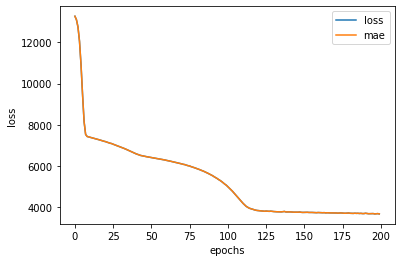

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

### Tensorflow Early stopping

`tf.keras.callbacks.EarlyStopping`



In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#set seed
tf.random.set_seed(42)
exp7_model=tf.keras.Sequential([
                                tf.keras.layers.Dense(100),
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
])

exp7_model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['mae'])

history7=exp7_model.fit(X_train,y_train,callbacks=[callback],verbose=0,epochs=200)


In [ ]:
exp7_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3624.6331 - mae: 3624.6331


[3624.633056640625, 3624.633056640625]

Text(0, 0.5, 'loss')

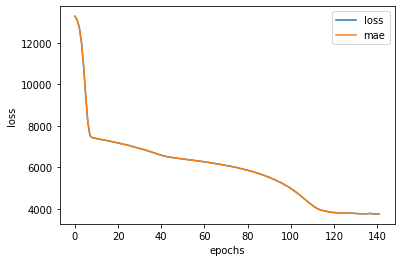

In [ ]:
pd.DataFrame(history7.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


#### Pre-processing data- normalizing and standardization

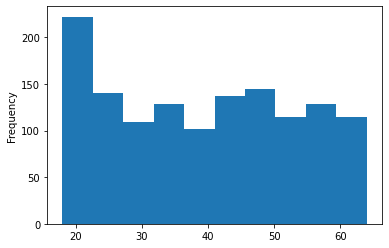

In [ ]:
X['age'].plot(kind="hist")

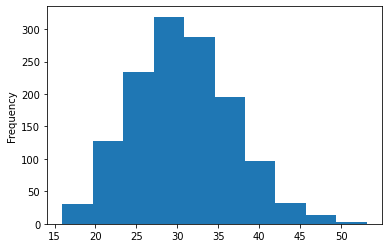

In [ ]:
X['bmi'].plot(kind="hist")

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])

)

In [ ]:
ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
#create x and y

X=df.drop("charges",axis=1)
y=df["charges"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#fit the column transformer
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

Now data is normalized we can build neural network

In [ ]:
#set random seed
tf.random.set_seed(42)

#create model
modelnorm=tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

modelnorm.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

modelnorm.fit(X_train_normal,y_train,epochs=100,verbose=0)

In [ ]:
modelnorm.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5139.3232 - mae: 5139.3232


[5139.3232421875, 5139.3232421875]

In [ ]:
y_train.mean(),y_train.median()

(13346.089736364489, 9575.4421)

model is making error of  avg 5139 which is high by looking at mean and median values.lets improve model



`Experiment 1`
Increase number of epochs with callback early stopping

In [ ]:
#create callback function
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)

#set seed
tf.random.set_seed(42)

#create model
modelnorm1=tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

modelnorm1.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"])

history1=modelnorm1.fit(X_train_normal,y_train,epochs=300,verbose=0)

In [ ]:
modelnorm1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4182.2676 - mae: 4182.2676


[4182.267578125, 4182.267578125]

Text(0, 0.5, 'loss')

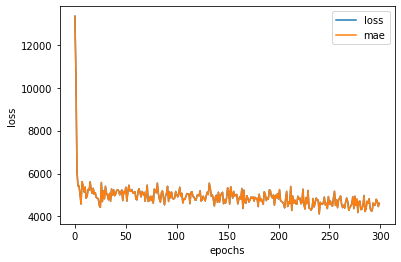

In [ ]:
pd.DataFrame(history1.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

`experiment 2` Change learning rate

In [ ]:
#create callback function
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)

#set seed
tf.random.set_seed(42)

#create model
modelnorm2=tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

modelnorm2.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                   metrics=["mae"])

history2=modelnorm2.fit(X_train_normal,y_train,epochs=300,verbose=0,callbacks=[callback])

modelnorm2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3218.5828 - mae: 3218.5828


[3218.582763671875, 3218.582763671875]

Text(0, 0.5, 'loss')

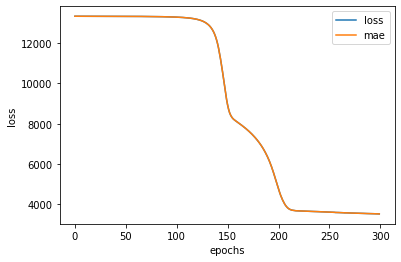

In [ ]:
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

`experiment 3` change optimizer to Adam

In [ ]:
#create callback function
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)

#set seed
tf.random.set_seed(42)

#create model
modelnorm3=tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

modelnorm3.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["mae"])

history3=modelnorm3.fit(X_train_normal,y_train,epochs=300,verbose=0,callbacks=[callback])

modelnorm3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3194.0515 - mae: 3194.0515


[3194.051513671875, 3194.051513671875]

Text(0, 0.5, 'loss')

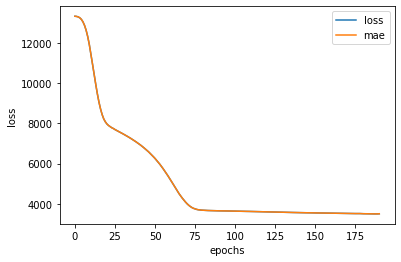

In [ ]:
pd.DataFrame(history3.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

`experiment 4`
Add layer

In [ ]:
#create callback function
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)

#set seed
tf.random.set_seed(42)

#create model
modelnorm4=tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(50),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

modelnorm4.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["mae"])

history4=modelnorm4.fit(X_train_normal,y_train,epochs=300,verbose=0,callbacks=[callback])

modelnorm4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3231.7390 - mae: 3231.7390


[3231.739013671875, 3231.739013671875]

Text(0, 0.5, 'loss')

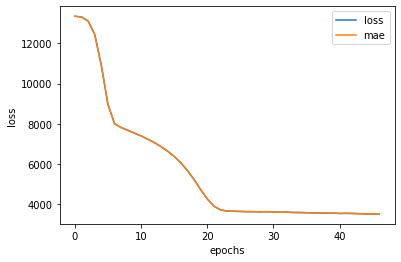

In [ ]:
pd.DataFrame(history4.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")